In [2]:
import numpy as np
import matplotlib.pyplot as plt

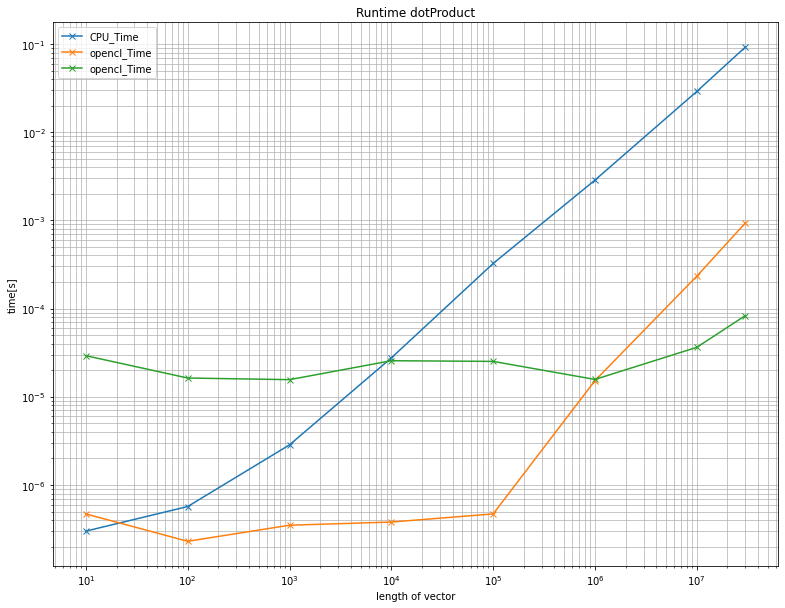

In [9]:
N = [10,100, 1000, 10000, 100000, 1000000, 10000000, 30000000]
CPU_time = [3e-07, 5.7e-07, 2.85e-06, 2.759e-05, 0.00032447, 0.00286088, 0.0289263, 0.0921195]
opencl_time = [4.7e-07,2.3e-07, 3.5e-07, 3.8e-07, 4.7e-07, 1.523e-05, 0.00023278, 0.00093314]
GPU_time = [2.922e-05, 1.632e-05, 1.564e-05, 2.564e-05, 2.519e-05, 1.573e-05, 3.635e-05,8.328e-05]
factor_CPU_opencl = [0.638298, 2.47826, 8.14286, 72.6053, 690.362, 187.845, 124.265, 98.7199]
factor_CPU_GPU = [0.00773196, 0.0181319, 0.0954561, 1.11926, 10.0644, 171.597, 842.527, 1095.57]

plt.figure(figsize=(13,10))
plt.loglog(N,CPU_time, label = "CPU_Time", marker='x')
plt.loglog(N,opencl_time, label = "opencl_Time", marker='x')
plt.loglog(N,GPU_time, label = "opencl_Time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Runtime dotProduct")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/Runtime_dotProduct")

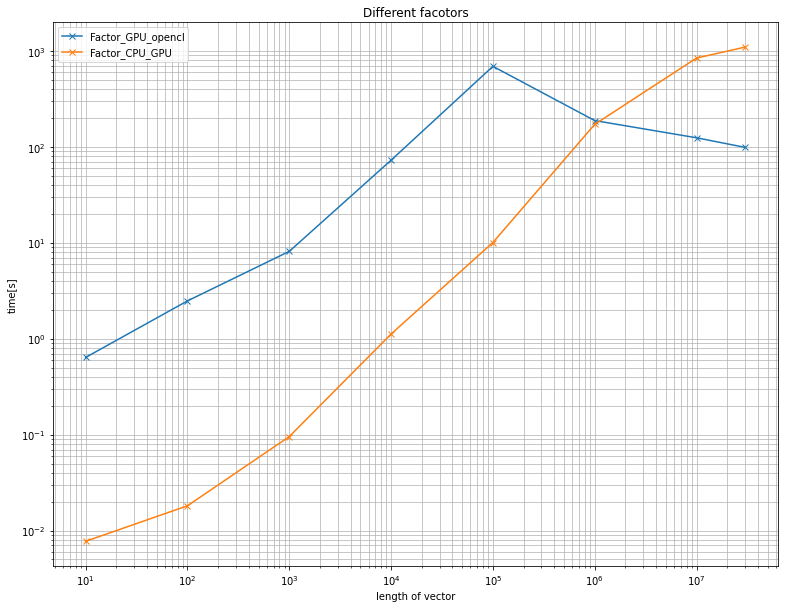

In [11]:
plt.figure(figsize=(13,10))
plt.loglog(N,factor_CPU_opencl, label = "Factor_GPU_opencl", marker='x')
plt.loglog(N,factor_CPU_GPU, label = "Factor_CPU_GPU", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Different facotors")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/diff_factor")